## Make Prediction Using Linear Model

In [3]:
import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from preprocessing import PrepareData
from jupyterthemes import jtplot
jtplot.style()

In [4]:
ppd = PrepareData()
sale_attrs = ppd.sales_attrs + ['Id']
df, sales = ppd.get_train_data(drop_cols=sale_attrs)
sale_price = df[['SalePrice']].values
# drop sale price before training
df.drop("SalePrice", axis=1, inplace=True)
values = df.values
y = sale_price.reshape(-1, 1)

In [5]:
# split into train and test sets
n_train_time = int(len(y)*0.9)
train_x = values[:n_train_time, :]
train_y = y[:n_train_time]
test_x = values[n_train_time:, :]
test_y = y[n_train_time:]

RMSE is: 0.0011571546916496842


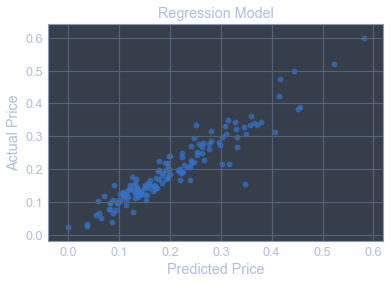

In [7]:
params = {
    'beta_1': 0.4, 'alpha': 1, 'activation': 'relu', 'solver': 'lbfgs', 'hidden_layer_sizes': 100}
clf = MLPRegressor(**params)
clf.fit(train_x, train_y)

predictions = clf.predict(test_x)
actual_values = test_y

print 'RMSE is:', mean_squared_error(test_y , predictions)
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Regression Model')
plt.show()

In [18]:
# lr = MLPRegressor(alpha=1, hidden_layer_sizes=200)
param1 = {'hidden_layer_sizes': 200, 'alpha':1}
print cross_val_score(MLPRegressor(**param1), values, y, cv=5)

[0.8834746  0.84810006 0.82902491 0.83872766 0.77189711]


In [20]:

print cross_val_score(MLPRegressor(**params), values, y, cv=5)

[0.86611768 0.8199053  0.8535163  0.86952685 0.74599654]


## real test

In [11]:
test_df, test_ids = ppd.get_test_data()

In [12]:
def convert_to_price(sales, predict_results):
    max_s = sales.SalePrice.max()
    min_s = sales.SalePrice.min()
    predicted_p = predict_results*(max_s - min_s) + min_s
    return predicted_p

In [13]:
params = {'beta_1': 0.4, 'alpha': 1, 'activation': 'relu', 'solver': 'lbfgs', 'hidden_layer_sizes': 100}

In [14]:
clf = MLPRegressor(**params)
clf.fit(values, y)
predict_results = clf.predict(test_df)

In [15]:
price = convert_to_price(sales, predict_results)

In [16]:
test_ids['SalePrice'] = price.transpose()

In [17]:
test_ids.to_csv("submission_nn.csv", index=False)

## Hyper-parameter Tunning

In [9]:
from sklearn.model_selection import GridSearchCV

In [4]:
import pickle
pickle.dump(values, open("values.pkl", 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [21]:
values = pickle.load(open("values.pkl", "rb"))
y = pickle.load(open("y.pkl", "rb"))

In [23]:
params = {
    'alpha': range(0, 2),
#     'beta_1': [i/10.0 for i in range(0, 10)],
#     'hidden_layer_sizes': range(50, 400, 50)
}
clf = GridSearchCV(MLPRegressor(), params, cv=5)
clf.fit(values, y)
clf.cv_results_['mean_test_score']

/Users/joannelam/programs/python/python2env/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.44226493, 0.83332892])

In [ ]:
print clf.best_score_
print clf.best_params_

In [25]:
clf

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'alpha': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)